# Datahacks!!

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import bar_chart_race as bcr

In [5]:
df = pd.read_csv('data.csv')
df

,name,diet,period,lived_in,type,length,taxonomy,named_by,species,link
0,aardonyx,herbivorous,Early Jurassic 199-189 million years ago,South Africa,sauropod,8.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Yates Bonnan Neveling Chinsamy and Blackbeard ...,celestae,https://www.nhm.ac.uk/discover/dino-directory/...
1,abelisaurus,carnivorous,Late Cretaceous 74-70 million years ago,Argentina,large theropod,9.0m,Dinosauria Saurischia Theropoda Neotheropoda C...,Bonaparte and Novas (1985),comahuensis,https://www.nhm.ac.uk/discover/dino-directory/...
2,achelousaurus,herbivorous,Late Cretaceous 83-70 million years ago,USA,ceratopsian,6.0m,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Sampson (1995),horneri,https://www.nhm.ac.uk/discover/dino-directory/...
3,achillobator,carnivorous,Late Cretaceous 99-84 million years ago,Mongolia,large theropod,5.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Perle Norell and Clark (1999),giganteus,https://www.nhm.ac.uk/discover/dino-directory/...
4,acrocanthosaurus,carnivorous,Early Cretaceous 115-105 million years ago,USA,large theropod,12.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Stovall and Langston (1950),atokensis,https://www.nhm.ac.uk/discover/dino-directory/...
...,...,...,...,...,...,...,...,...,...,...
304,yuanmousaurus,herbivorous,Mid Jurassic 180-159 million years ago,China,sauropod,17.0m,Dinosauria Saurischia Sauropodomorpha Sauropod...,Lü Li Ji Wang Zhang and Dong (2006),jiangyiensis,https://www.nhm.ac.uk/discover/dino-directory/...
305,yunnanosaurus,omnivorous,Early Jurassic 205-190 million years ago,China,sauropod,7.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Young (1942),huangi,https://www.nhm.ac.uk/discover/dino-directory/...
306,zalmoxes,herbivorous,Late Cretaceous 69 million years ago,Romania,euornithopod,3.0m,Dinosauria Ornithischia Genasauria Cerapoda Or...,Nopcsa (1902),robustus,https://www.nhm.ac.uk/discover/dino-directory/...
307,zephyrosaurus,herbivorous,Early Cretaceous 120-110 million years ago,USA,euornithopod,1.8m,Dinosauria Ornithischia Genasauria Cerapoda Or...,Sues (1980),schaffi,https://www.nhm.ac.uk/discover/dino-directory/...


In [17]:
df = df.dropna() # dropping NaN rows
df

def get_period_name (period_str):
    period_list = period_str.split() # splitting by white space and gets list of strings
    period_name = period_list[0] + " " + period_list[1]
    return period_name

def get_period_to (period_str):
    period_list = period_str.split() # splitting by white space and gets list of strings
    if len(period_list) > 2:
        if "-" not in period_str:
            return int(period_list[2])
        else:
            period_years = period_list[2].split('-')
            return int(period_years[0])

def get_period_from (period_str):
    period_list = period_str.split() # splitting by white space and gets list of strings
    
    if len(period_list) > 2:
        if "-" not in period_str:
            return int(period_list[2])
        else:
            period_years = period_list[2].split('-')
            return int(period_years[1])

def str_to_num (length_str):
    str_list = length_str.replace('m','')
    return float(str_list)

names = df.get('period').apply(get_period_name)
to_year = df.get('period').apply(get_period_to)
from_year = df.get('period').apply(get_period_from)
int_len = df.get('length').apply(str_to_num)

cleaned_df = df.assign(period_name = names, to_years_ago = to_year, from_years_ago = from_year, len_as_int = int_len)

cleaned_df = cleaned_df.dropna()
cleaned_df

#get_period_to("Early Jurassic 199-189 million years ago")

,name,diet,period,lived_in,type,length,taxonomy,named_by,species,link,period_name,to_years_ago,from_years_ago,len_as_int
0,aardonyx,herbivorous,Early Jurassic 199-189 million years ago,South Africa,sauropod,8.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Yates Bonnan Neveling Chinsamy and Blackbeard ...,celestae,https://www.nhm.ac.uk/discover/dino-directory/...,Early Jurassic,199.0,189.0,8.0
1,abelisaurus,carnivorous,Late Cretaceous 74-70 million years ago,Argentina,large theropod,9.0m,Dinosauria Saurischia Theropoda Neotheropoda C...,Bonaparte and Novas (1985),comahuensis,https://www.nhm.ac.uk/discover/dino-directory/...,Late Cretaceous,74.0,70.0,9.0
2,achelousaurus,herbivorous,Late Cretaceous 83-70 million years ago,USA,ceratopsian,6.0m,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Sampson (1995),horneri,https://www.nhm.ac.uk/discover/dino-directory/...,Late Cretaceous,83.0,70.0,6.0
3,achillobator,carnivorous,Late Cretaceous 99-84 million years ago,Mongolia,large theropod,5.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Perle Norell and Clark (1999),giganteus,https://www.nhm.ac.uk/discover/dino-directory/...,Late Cretaceous,99.0,84.0,5.0
4,acrocanthosaurus,carnivorous,Early Cretaceous 115-105 million years ago,USA,large theropod,12.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Stovall and Langston (1950),atokensis,https://www.nhm.ac.uk/discover/dino-directory/...,Early Cretaceous,115.0,105.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,yinlong,herbivorous,Mid Jurassic 159-154 million years ago,China,ceratopsian,1.2m,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Xu Forster Clark and Mo (2006),downsi,https://www.nhm.ac.uk/discover/dino-directory/...,Mid Jurassic,159.0,154.0,1.2
304,yuanmousaurus,herbivorous,Mid Jurassic 180-159 million years ago,China,sauropod,17.0m,Dinosauria Saurischia Sauropodomorpha Sauropod...,Lü Li Ji Wang Zhang and Dong (2006),jiangyiensis,https://www.nhm.ac.uk/discover/dino-directory/...,Mid Jurassic,180.0,159.0,17.0
305,yunnanosaurus,omnivorous,Early Jurassic 205-190 million years ago,China,sauropod,7.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Young (1942),huangi,https://www.nhm.ac.uk/discover/dino-directory/...,Early Jurassic,205.0,190.0,7.0
306,zalmoxes,herbivorous,Late Cretaceous 69 million years ago,Romania,euornithopod,3.0m,Dinosauria Ornithischia Genasauria Cerapoda Or...,Nopcsa (1902),robustus,https://www.nhm.ac.uk/discover/dino-directory/...,Late Cretaceous,69.0,69.0,3.0


In [18]:
cleaned_df.get("period_name").unique() # number of different period names

array(['Early Jurassic', 'Late Cretaceous', 'Early Cretaceous',
       'Late Jurassic', 'Mid Jurassic', 'Late Triassic'], dtype=object)

In [19]:
dino_length_df = cleaned_df.groupby(['period_name', "length"]).count().get(['name'])
dino_length_df

name
period_name      length      
Early Cretaceous 0.25m      1
                 0.45m      1
                 0.8m       1
                 1.0m       3
                 1.3m       1
...                       ...
Mid Jurassic     5.0m       1
                 5.7m       1
                 7.0m       1
                 7.6m       1
                 9.0m       2

[150 rows x 1 columns]

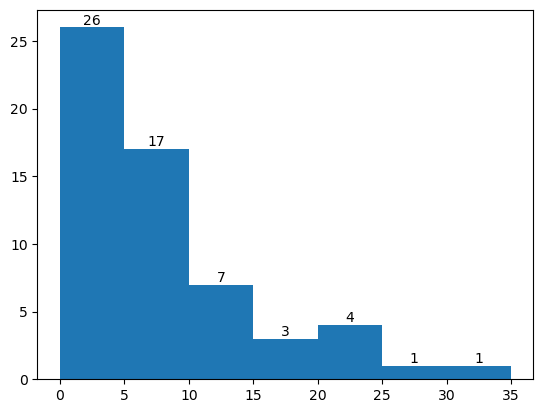

In [20]:
ec_dino_length_df = cleaned_df[cleaned_df['period_name'].str.contains("Early Cretaceous")]
#ec_dino_length_df = ec_dino_length_df.groupby('len_as_int').count().reset_index().get(['name','len_as_int']).sort_values(by= 'name', ascending = True)
#ec_dino_length_df.sort_values(by="len_as_int", ascending = True)
bin = np.arange(0,max(ec_dino_length_df["len_as_int"]) + 5, 5)
# ec_dino_length_df.plot(kind='hist', bins=bin, x= 'len_as_int', xlabel = 'Length (Meters)', title = time_period_name + " Dinosaur Lengths", legend = False)

sd_counts, sd_edges, sd_bars = plt.hist(ec_dino_length_df["len_as_int"], bins=bin);
plt.bar_label(sd_bars);


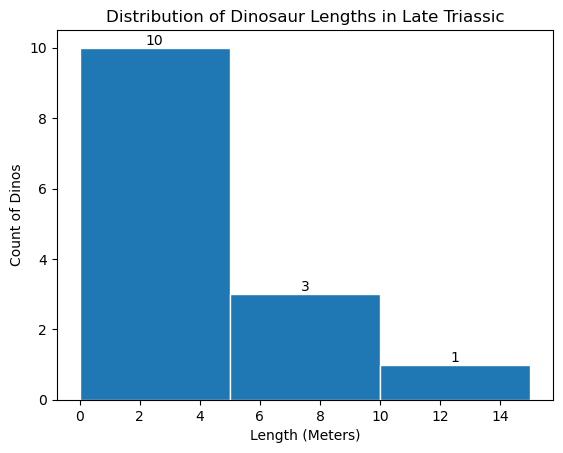

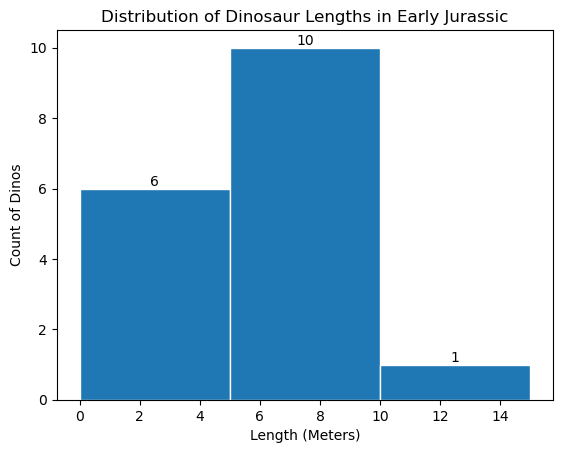

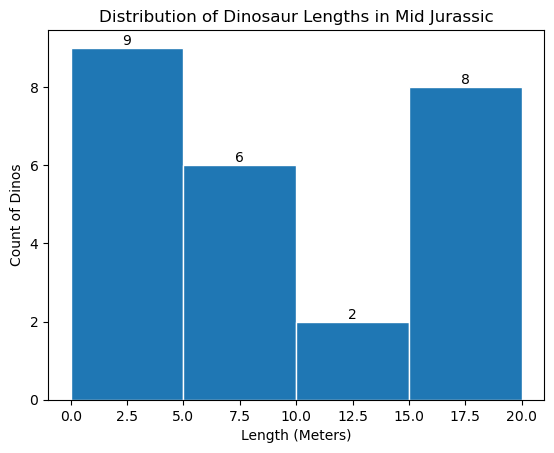

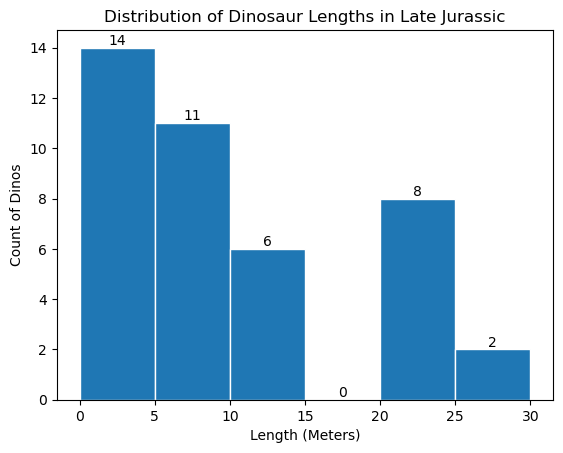

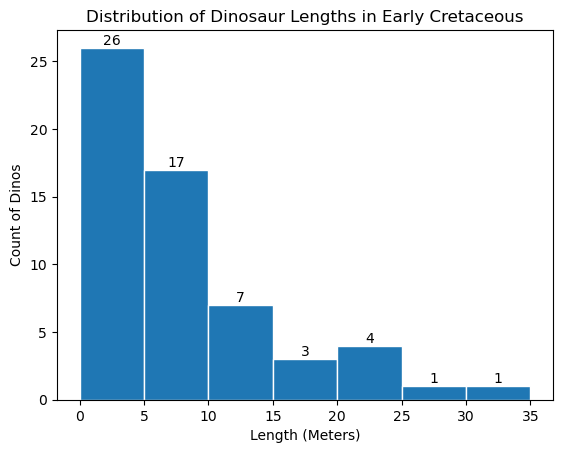

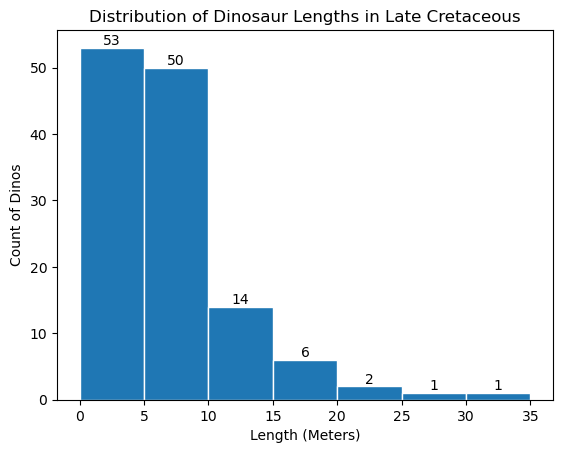

In [21]:
def plot_dino_len (time_period_name):
    ec_dino_length_df = cleaned_df[cleaned_df['period_name'].str.contains(time_period_name)]

    # ec_dino_length_df = ec_dino_length_df.groupby('len_as_int').count().reset_index().get(['name','len_as_int']).sort_values(by= 'name', ascending = True)
    # ec_dino_length_df
    bin = np.arange(0,max(ec_dino_length_df["len_as_int"]) + 5, 5)
    # ec_dino_length_df.plot(kind='hist', bins=bin, x= 'len_as_int', xlabel = 'Length (Meters)', title = time_period_name + " Dinosaur Lengths", legend = False)
    plt.figure()
    dino_counts, dino_edges, dino_bars = plt.hist(ec_dino_length_df["len_as_int"], bins=bin, ec = 'w')
    plt.bar_label(dino_bars)

    plt.xlabel('Length (Meters)')
    plt.ylabel('Count of Dinos')
    plt.title('Distribution of Dinosaur Lengths in ' + time_period_name)

plot_dino_len('Late Triassic')
plot_dino_len('Early Jurassic')
plot_dino_len("Mid Jurassic")
plot_dino_len('Late Jurassic')
plot_dino_len("Early Cretaceous")
plot_dino_len("Late Cretaceous")

In [41]:
to = cleaned_df.get('from_years_ago')
from_ = cleaned_df.get('to_years_ago')
avg_year = (to + from_) / 2
avg_year

0      194.0
1       72.0
2       76.5
3       91.5
4      110.0
       ...  
303    156.5
304    169.5
305    197.5
306     69.0
307    115.0
Length: 283, dtype: float64

In [50]:
unique_year = bar_race_df.get('avg_year_ago').unique()
print(unique_year)
print(max(unique_year))
print(min(unique_year))
print(len(unique_year))

[194.   72.   76.5  91.5 110.   95.5 126.5 164.   67.5  77.5  75.   80.
  68.  150.   87.  129.5 187.5 173.  190.   70.5  74.5 149.5  89.  147.
  82.5  90.   69.5 109.  105.5 177.5 125.  137.  124.  169.5 147.5  88.5
  94.5 145.   96.   70.  123.5 134.5 150.5 167.5 165.  148.5 218.5  73.
  78.  215.5 142.5  78.5 170.  152.  115.   96.5  74.  152.5 185.  228.
  94.  148.  101.  156.5  76.  205.  197.5 113.  192.5 112.5  66.  203.5
 199.5 116.5 200.  206.  162.5 224.  105.  145.5 107.5  77.  161.5 210.
 166.5  72.5 121.   85.   95.  198.5 201.   92.5 134.  155.5  79.   71.5
 216.   67.   73.5 106.  131.5  69. ]
228.0
66.0
102


In [76]:
new_avg_year = np.array([])
for i in avg_year:
    if (i >= 60) & (i < 70):
        new_avg_year = np.append(new_avg_year, 60)
    elif (i >= 70) & (i < 80):
        new_avg_year = np.append(new_avg_year, 70)
    elif (i >= 80) & (i < 90):
        new_avg_year = np.append(new_avg_year, 80)
    elif (i >= 90) & (i < 100):
        new_avg_year = np.append(new_avg_year, 90)
    elif (i >= 100) & (i < 110):
        new_avg_year = np.append(new_avg_year, 100)
    elif (i >= 110) & (i < 120):
        new_avg_year = np.append(new_avg_year, 110)    
    elif (i >= 120) & (i < 130):
        new_avg_year = np.append(new_avg_year, 120)
    elif (i >= 130) & (i < 140):
        new_avg_year = np.append(new_avg_year, 130)
    elif (i >= 140) & (i < 150):
        new_avg_year = np.append(new_avg_year, 140)
    elif (i >= 150) & (i < 160):
        new_avg_year = np.append(new_avg_year, 150)
    elif (i >= 160) & (i < 170):
        new_avg_year = np.append(new_avg_year, 160)
    elif (i >= 170) & (i < 180):
        new_avg_year = np.append(new_avg_year, 170)
    elif (i >= 180) & (i < 190):
        new_avg_year = np.append(new_avg_year, 180)
    elif (i >= 190) & (i < 200):
        new_avg_year = np.append(new_avg_year, 190)
    elif (i >= 200) & (i < 210):
        new_avg_year = np.append(new_avg_year, 200)
    elif (i >= 210) & (i < 220):
        new_avg_year = np.append(new_avg_year, 210)
    else:
        new_avg_year = np.append(new_avg_year, 220)
new_avg_year

array([190.,  70.,  70.,  90., 110.,  90., 120., 160.,  60.,  70.,  70.,
        80.,  60., 150.,  80., 120., 180.,  60., 170.,  70., 190.,  70.,
        70.,  70., 140., 120.,  80., 110., 140.,  80.,  90.,  60., 100.,
        70., 100.,  70.,  70.,  70.,  80.,  70., 170., 150., 120., 130.,
       120., 160.,  70., 140.,  80., 150.,  90., 140., 150.,  90.,  70.,
       120., 130., 150., 160., 160., 140., 210., 150.,  70., 100., 150.,
        70., 150., 210., 140.,  70., 120.,  70., 170., 150.,  70., 170.,
        60., 110.,  90., 140., 150.,  70.,  70., 140.,  70.,  70.,  70.,
        70., 150., 180., 220., 120.,  90., 140., 150., 160., 110., 110.,
        70., 140.,  90., 160.,  70., 130., 100.,  70., 140., 110.,  70.,
        70.,  70., 210., 150.,  70., 140., 110., 220., 140., 200.,  70.,
        70., 160., 140.,  70., 120., 120.,  60., 100., 150.,  80., 190.,
       110., 150., 150.,  70., 190.,  70.,  70., 110.,  60., 110., 200.,
        70., 190., 190., 110., 200.,  60.,  70.,  7

In [77]:
bar_race_df = cleaned_df.assign(avg_year_ago= avg_year, grouped_avg_year= new_avg_year)
#bar_race_df = bar_race_df.set_index('avg_year_ago')
#bar_race_df = bar_race_df.get(['lived_in', 'period_name', 'to_years_ago', 'from_years_ago', 'len_as_int'])
#bar_race_df = bar_race_df.groupby(['grouped_avg_year', 'lived_in']).count()
bar_race_df 

,name,diet,period,lived_in,type,length,taxonomy,named_by,species,link,period_name,to_years_ago,from_years_ago,len_as_int,avg_year_ago,grouped_avg_year
0,aardonyx,herbivorous,Early Jurassic 199-189 million years ago,South Africa,sauropod,8.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Yates Bonnan Neveling Chinsamy and Blackbeard ...,celestae,https://www.nhm.ac.uk/discover/dino-directory/...,Early Jurassic,199.0,189.0,8.0,194.0,190.0
1,abelisaurus,carnivorous,Late Cretaceous 74-70 million years ago,Argentina,large theropod,9.0m,Dinosauria Saurischia Theropoda Neotheropoda C...,Bonaparte and Novas (1985),comahuensis,https://www.nhm.ac.uk/discover/dino-directory/...,Late Cretaceous,74.0,70.0,9.0,72.0,70.0
2,achelousaurus,herbivorous,Late Cretaceous 83-70 million years ago,USA,ceratopsian,6.0m,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Sampson (1995),horneri,https://www.nhm.ac.uk/discover/dino-directory/...,Late Cretaceous,83.0,70.0,6.0,76.5,70.0
3,achillobator,carnivorous,Late Cretaceous 99-84 million years ago,Mongolia,large theropod,5.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Perle Norell and Clark (1999),giganteus,https://www.nhm.ac.uk/discover/dino-directory/...,Late Cretaceous,99.0,84.0,5.0,91.5,90.0
4,acrocanthosaurus,carnivorous,Early Cretaceous 115-105 million years ago,USA,large theropod,12.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Stovall and Langston (1950),atokensis,https://www.nhm.ac.uk/discover/dino-directory/...,Early Cretaceous,115.0,105.0,12.0,110.0,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,yinlong,herbivorous,Mid Jurassic 159-154 million years ago,China,ceratopsian,1.2m,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Xu Forster Clark and Mo (2006),downsi,https://www.nhm.ac.uk/discover/dino-directory/...,Mid Jurassic,159.0,154.0,1.2,156.5,150.0
304,yuanmousaurus,herbivorous,Mid Jurassic 180-159 million years ago,China,sauropod,17.0m,Dinosauria Saurischia Sauropodomorpha Sauropod...,Lü Li Ji Wang Zhang and Dong (2006),jiangyiensis,https://www.nhm.ac.uk/discover/dino-directory/...,Mid Jurassic,180.0,159.0,17.0,169.5,160.0
305,yunnanosaurus,omnivorous,Early Jurassic 205-190 million years ago,China,sauropod,7.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Young (1942),huangi,https://www.nhm.ac.uk/discover/dino-directory/...,Early Jurassic,205.0,190.0,7.0,197.5,190.0
306,zalmoxes,herbivorous,Late Cretaceous 69 million years ago,Romania,euornithopod,3.0m,Dinosauria Ornithischia Genasauria Cerapoda Or...,Nopcsa (1902),robustus,https://www.nhm.ac.uk/discover/dino-directory/...,Late Cretaceous,69.0,69.0,3.0,69.0,60.0


In [78]:
uni_new_year = np.unique(new_avg_year)
uni_new_year

array([ 60.,  70.,  80.,  90., 100., 110., 120., 130., 140., 150., 160.,
       170., 180., 190., 200., 210., 220.])

In [75]:

for i in uni_new_year:
    df = bar_race_df[bar_race_df.get('grouped_avg_year') == i]
    df = df.groupby(['grouped_avg_year', 'lived_in']).count()
    df = df.get(['name'])
    print(df)
    

                            name
grouped_avg_year lived_in       
60.0             Argentina     3
                 Canada        1
                 France        1
                 India         1
                 Mongolia      2
                 Romania       2
                 USA           8
                             name
grouped_avg_year lived_in        
70.0             Argentina      5
                 Canada        11
                 China          7
                 Madagascar     2
                 Mongolia      25
                 Spain          3
                 USA           25
                 Uruguay        1
                             name
grouped_avg_year lived_in        
80.0             Argentina      1
                 Brazil         1
                 Kazakhstan     2
                 Mongolia       6
                 Morocco        1
                 USA            1
                 Uzbekistan     1
                               name
grouped_avg_year live

In [81]:
data = [[60, 8, 2, 1, 0, 0, 7], [70, 25, 25, 11, 7, 0, 11], [80, 1, 6, 0, 0, 0, 6], [90, 3, 5, 0, 0, 0, 10], [100, 3, 0, 0, 0, 0, 8], [110, 5, 1, 0, 3, 0, 11], [120, 0, 0, 0, 9, 7, 5], [130, 2, 1, 0, 0, 2, 0], [140, 13, 0, 0, 2, 1, 5], [150, 7, 0, 0, 8, 2, 6], [160, 0, 0, 0, 9, 5, 3], [170, 0, 0, 0, 1, 0, 4], [180, 3, 0, 0, 0, 0, 1], [190, 1, 0, 0, 4, 1, 3], [200, 1, 0, 0, 0, 1, 5], [210, 1, 0, 0, 0, 1, 6], [220, 0, 0, 0, 0, 0, 3]]
race_df = pd.DataFrame(data, columns= ['year', 'USA', 'Mongolia', 'Canada', 'China', 'United Kingdom', 'Other'])
race_df

,year,USA,Mongolia,Canada,China,United Kingdom,Other
0,60,8,2,1,0,0,7
1,70,25,25,11,7,0,11
2,80,1,6,0,0,0,6
3,90,3,5,0,0,0,10
4,100,3,0,0,0,0,8
5,110,5,1,0,3,0,11
6,120,0,0,0,9,7,5
7,130,2,1,0,0,2,0
8,140,13,0,0,2,1,5
9,150,7,0,0,8,2,6


In [85]:
bcr.bar_chart_race(
    df = race_df,
    filename = 'dinosaur_race.mp4', 
    orientation = 'h',
    sort = 'desc', 
    n_bars= 6,
    fixed_order= False,
    fixed_max = True,
    steps_per_period = 10,
    interpolate_period = False, 
    label_bars = True, 
    bar_size = 0.95, 
    period_label= {'x': 0.99, 'y': 0.25, 'ha':'right', 'va': 'center'},
    period_fmt = '%B %d, %Y', 
     period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Total deaths: {v.nlargest(6).sum():,.0f}',
                                      'ha': 'right', 'size': 8, 'family': 'Courier New'},
    perpendicular_bar_func='median',
    period_length=500,
    figsize=(5, 3),
    dpi=144,
    cmap='dark12',
    title='Dinosaur Location Distribution over Time',
    title_size='',
    bar_label_size=7,
    tick_label_size=7,
    shared_fontdict={'family' : 'Helvetica', 'color' : '.1'},
    scale='linear',
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .7},
    filter_column_colors=False
)

/Users/ivytram/opt/anaconda3/envs/datahacks/lib/python3.12/site-packages/bar_chart_race/_make_chart.py:889: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_values.iloc[:, 0] = df_values.iloc[:, 0].fillna(method='ffill')
/Users/ivytram/opt/anaconda3/envs/datahacks/lib/python3.12/site-packages/bar_chart_race/_make_chart.py:286: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(self.df_values.columns)
/Users/ivytram/opt/anaconda3/envs/datahacks/lib/python3.12/site-packages/bar_chart_race/_make_chart.py:287: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))
MovieWriter ffmpeg unavailable; using Pillow instead.


Exception: You do not have ffmpeg installed on your machine. Download
                            ffmpeg from here: https://www.ffmpeg.org/download.html.
                            
                            Matplotlib's original error message below:

                            unknown file extension: .mp4
                            